## SGD (Stochastic Gradient Descent)

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

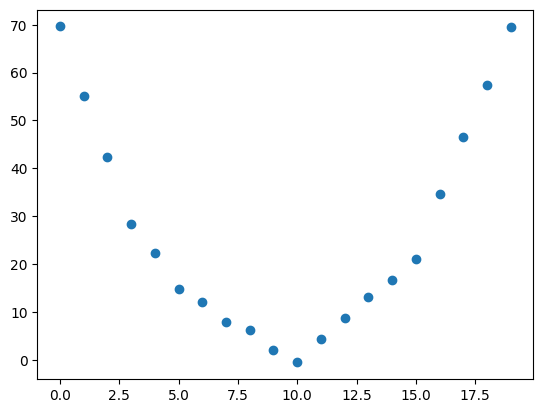

In [2]:
time = torch.arange(0, 20).float()
speed = torch.randn(20)*3 + 0.75*(time - 9.5)**2 + 1
plt.scatter(time, speed)

In [3]:
def f(t, params):
    a, b, c = params
    return a*(t**2) + (b*t) + c

def mse(preds, targets): return ((preds - targets)**2).mean().sqrt()

def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= 1e-3 * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

def show_preds(preds, ax=None):
    if ax is None: ax = plt.subplots()[1]
    n_preds = preds.detach().numpy()
    ax.scatter(time, speed)
    ax.scatter(time, n_preds, color='red')
    ax.set_ylim(-300,100)

Step 1 : 파라미터 초기화

파라미터를 임의의 값으로 초기화하고 requires_grad_메서드를 사용해 파이토치가 파라미터의 그레이디언트를 추적할 수 있도록 함

In [5]:
params = torch.randn(3).requires_grad_()

Step 2 : 예측 계산

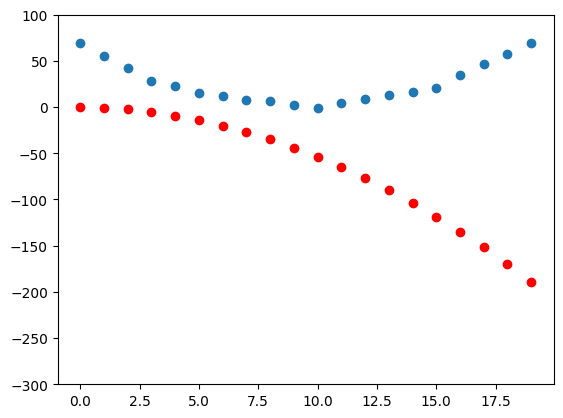

In [6]:
preds = f(time, params)
show_preds(preds)

Step 3 : 손실 계산

In [7]:
loss = mse(preds, speed); loss

tensor(115.1144, grad_fn=<SqrtBackward0>)

step 4 : 그레이디언트 계산

In [8]:
loss.backward()
params.grad
params.grad * 1e-3
params

tensor([-0.5058, -0.3412,  0.1788], requires_grad=True)

step 5 : 가중치를 한 단계 갱신하기

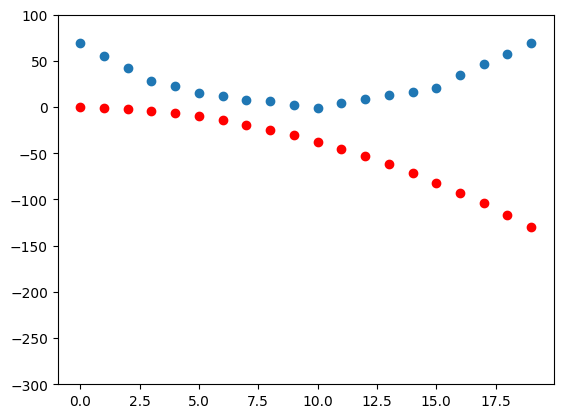

In [9]:
params.data -= 1e-3 * params.grad.data
params.grad = None
preds = f(time, params)
mse(preds, speed)
show_preds(preds)

10회 반복

In [10]:
for i in range(10):
    apply_step(params)

88.38053131103516
62.82572937011719
40.31835174560547
26.595003128051758
24.844749450683594
24.837697982788086
24.837425231933594
24.8372802734375
24.83713722229004
24.83699607849121


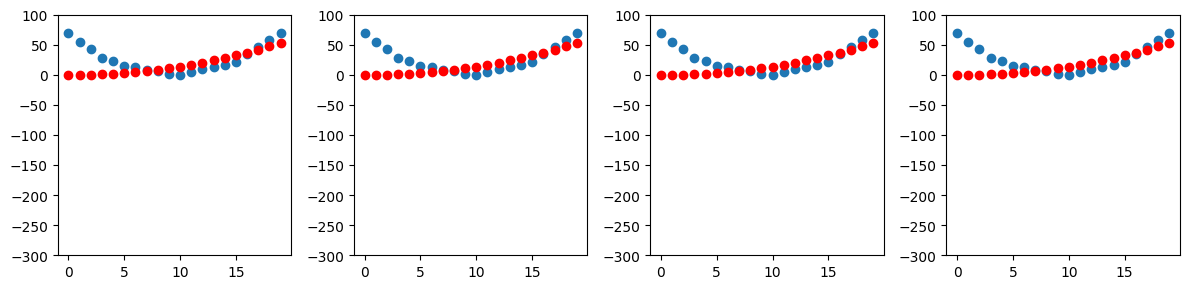

In [12]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()